# kNN Project HW- Bank Authentication Dataset
## Mohamed R Helayhel
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data to model. 
5. Predict the test data.
6. Evaluate the first algorithm and its model performance.
7. Evaluate the current algorithm and variety of algorithms by creating test harness for diverse
    algorithms in conjunction with resampling techniques like cross validation, variable importance.
    bootstrapping.Improve Result by playing with hyperparameters and innovative methods like 
   ensembles.
8. Choose the best model and present the results.

In [2]:
#Import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 1-Define the Research problem and questions
The Dataset was retrieved from UCI Machine Learning Repository (Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

### Description
#### Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

### Question to answer
##### Use the four attributes: Variance, skewness, curtosis and entropy to determine the class (authenticity) of the banknotes. The Labels are 0 as authentic, 1 is counterfeit based on the information available on the web.


In [4]:
# Read the data, print the shape and first 5 rows.
bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
print(bankNoteAuth.shape)
print(bankNoteAuth.head())

(1371, 5)
   variance  skewness  curtosis  entropy  class
0   4.54590    8.1674   -2.4586 -1.46210      0
1   3.86600   -2.6383    1.9242  0.10645      0
2   3.45660    9.5228   -4.0112 -3.59440      0
3   0.32924   -4.4552    4.5718 -0.98880      0
4   4.36840    9.6718   -3.9606 -3.16250      0


## 2-Analyze data by descriptive statistics and graphical visualization.

In [5]:
# Print the summary of the data

print(bankNoteAuth.describe())
print(bankNoteAuth.describe().T)

          variance     skewness     curtosis      entropy        class
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
           count      mean       std      min      25%      50%      75%  \
variance  1371.0  0.431410  2.842494  -7.0421 -1.77470  0.49571  2.81465   
skewness  1371.0  1.917434  5.868359 -13.7731 -1.71130  2.31340  6.81310   
curtosis  1371.0  1.400694  4.310105  -5.2861 -1.55335  0.61663  3.18160   
entropy   1371.0 -1.192200  2.101683  -8.5482 -2.41700 -0

In [6]:
# Print the datatypes which are keys.
types = bankNoteAuth.dtypes
print(types)
print("Keys of bank Note Authentication dataset:\n", bankNoteAuth.keys())

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object
Keys of bank Note Authentication dataset:
 Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [8]:
# print the target variable
# Labels: 0 as authentic, 1 is counterfeit.
print("class:", bankNoteAuth['class'])

class: 0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64


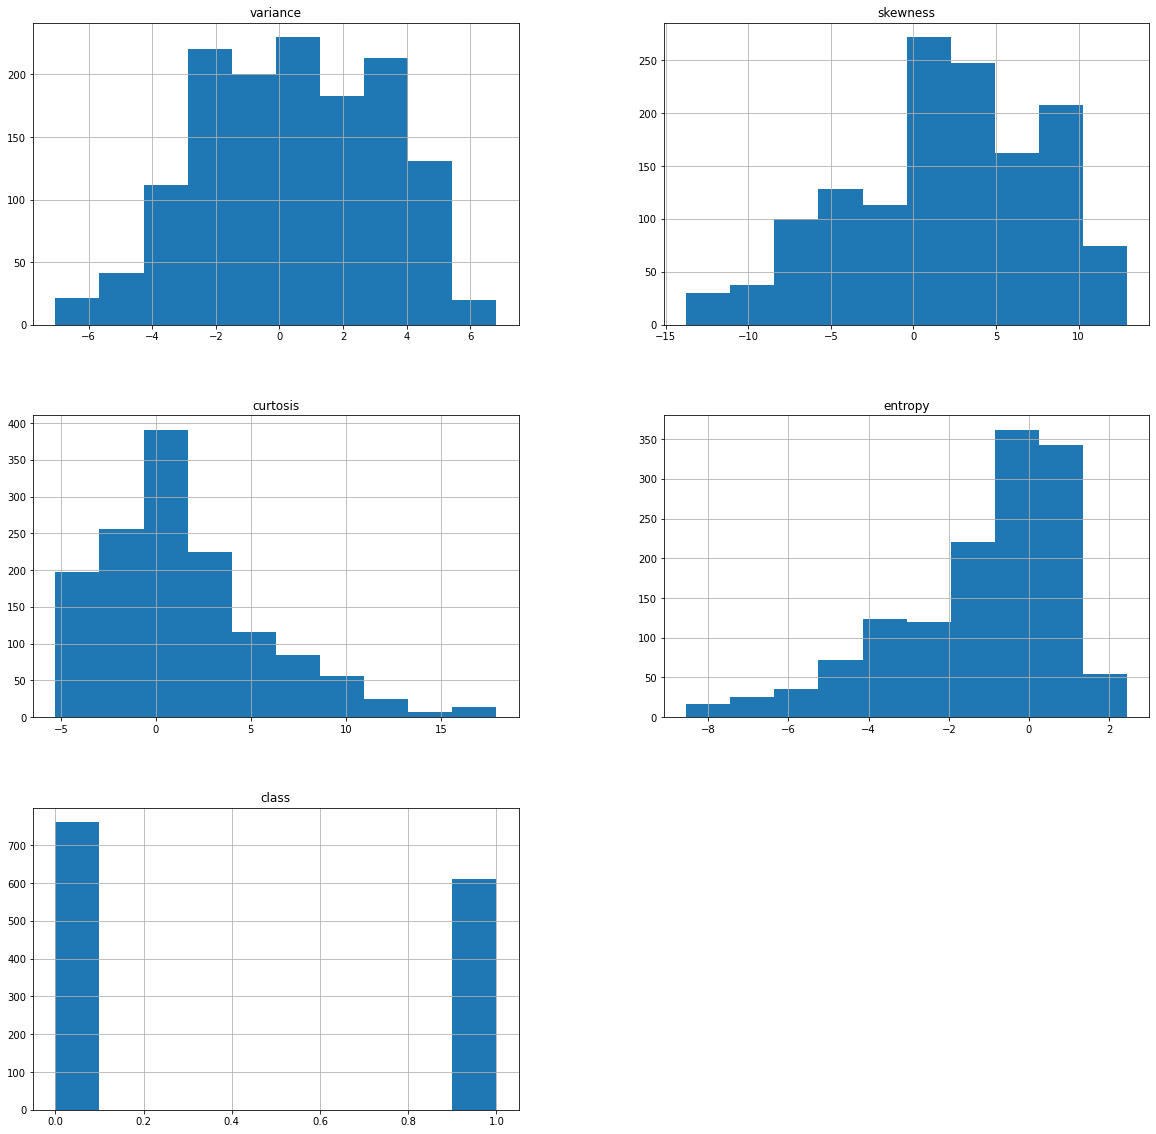

In [10]:
# Create the histogram of all the variables.

%matplotlib inline
bankNoteAuth.hist(figsize = (20,20))
plt.show()

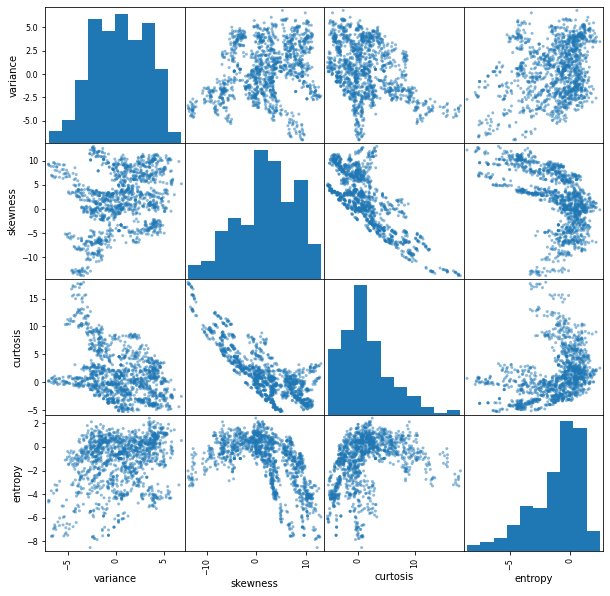

In [11]:
# create a grid of scatterplot and histogram

%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(10, 10))
plt.show() 

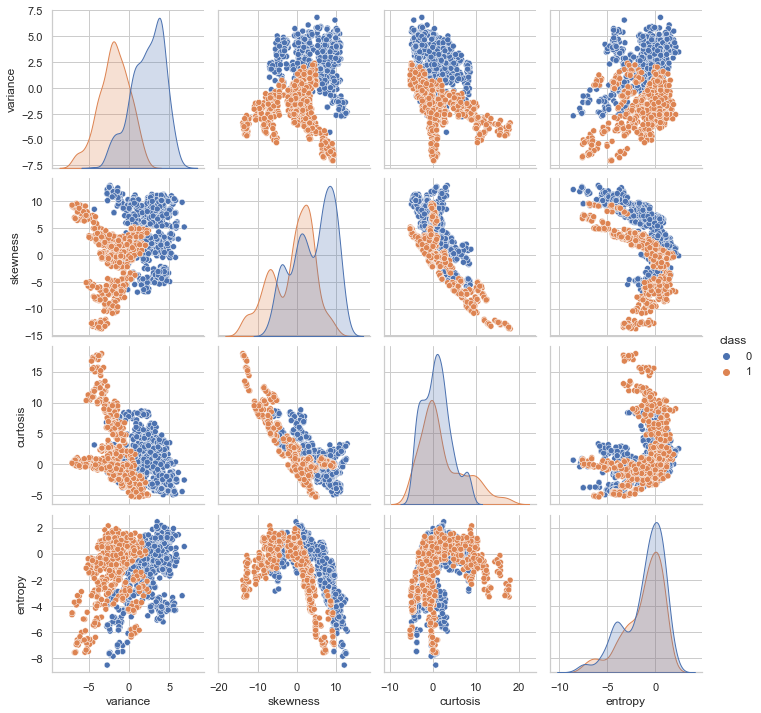

In [144]:
#Creating a pairplot differentiatied by Class

%matplotlib inline
X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy','class']] 
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'class')
plt.show() 

## Comments
#### Looking at the historgram of all the variables. We see that the 'variance' has a normal distrubition while 'skewness' has a slight negative skew. The other two predictor variables have stronger skews, where entropy has a heavy negative skew and curtosis has a heavy positive skew. kNN is non-parametric therefore the distributions should not impact the results.
#### Additionally, the 'class' variable to be predicted is balanced across the two labels, which has direct implications on the metrics that can be used for model assessment. For example, the use of the accuracy metric is valid for this application due to this balanced output variable.

#### Note: The pairplots are relied on for subsequent analysis and model evaluation

## 3- Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,dealing with null and outlier values. Divide data into test and training set.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Risk'

X = bankNoteAuth[['variance', 'skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]

# Check if null values in the columns
X.isna().sum()


variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [58]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1028, 4)
y_train shape: (1028, 1)
X_test shape: (343, 4)
y_test shape: (343, 1)


## 4-Fit the train data to model.


In [59]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting 
#the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens 
# the numpy.ndarray.

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

## 5- Predict the test data.

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)


[[191   0]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343

100.0


## 6-A) Evaluate the first algorithm and its model performance.

#### 1) Given the results seen in the pairplot in section 2 above, we see a very distinct differentation between the classes. This is especially obvious for the skewness and variance plotted together, where we see a clear boundary between the fake and authentic banknotes based on those two input parameters. It is noteworthy that the bounday is not linear, which makes the kNN algorithm a good candidate to predict and classify the test data. Given that the separation between the classes is visible and distinct, getting a high testing accuracy with a 75-25 split between the train and test data respectively is expected. 
#### 2) In order to create a bigger challenge for the algorithm (and a better learning opportunity for me), I will only use three parameters for the model by excluding the variance parameter from the input data and repeat the work done above. The reason for excluding the variance parameter is also due to the pairplot which shows that it is capable of creating separation between fake and real banknotes as a standalone predictor. This is only for exploratory purposes since having the variance in the model is definitely a better option.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Divide data into predictor features vector and the label of the target variable 'Risk'

X = bankNoteAuth[['skewness', 'curtosis', 'entropy']] 
y = bankNoteAuth[['class']]

In [63]:
# Dividing data into two subsets training and test set.Training set trains the model
# X train: predictive variables in train set y train: train labels
# X test: predictive variables in test set y test test labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Data normalization  

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1028, 3)
y_train shape: (1028, 1)
X_test shape: (343, 3)
y_test shape: (343, 1)


In [64]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels. Fitting 
#the k-NN classiifer
# np.ravel() converts labels from a column format to the expected row format and flattens 
# the numpy.ndarray.

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)


[[188   7]
 [ 11 137]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       195
           1       0.95      0.93      0.94       148

    accuracy                           0.95       343
   macro avg       0.95      0.94      0.95       343
weighted avg       0.95      0.95      0.95       343

94.75218658892129


## 6-B) Evaluate the first algorithm and its model performance.
#### After excluding the 'variance' input parameter, the accuracy of the model drops to 94.75% with a test to train split of 75-25% and with a k=10. This will enable further finetuning to get a better model in the next steps. 

## 7- Evaluate the current algorithm and variety of algorithms by creating test harness for diverse algorithms in conjunction with resampling techniques like cross validation, variable importance. bootstrapping.Improve Result by playing with hyperparameters and innovative methods like ensembles.

## 7-A) Performance Improvement techniques:k values

[0.9737609329446064, 0.9708454810495627, 0.956268221574344, 0.9475218658892128, 0.9475218658892128, 0.9446064139941691, 0.9416909620991254, 0.9475218658892128, 0.9446064139941691, 0.9416909620991254, 0.9504373177842566, 0.9475218658892128, 0.9533527696793003, 0.9446064139941691, 0.9475218658892128, 0.9387755102040817, 0.9416909620991254, 0.9358600583090378, 0.9387755102040817, 0.9358600583090378, 0.9416909620991254, 0.9329446064139941, 0.9416909620991254, 0.9416909620991254, 0.9416909620991254, 0.9387755102040817, 0.9387755102040817, 0.9271137026239067, 0.9300291545189504, 0.9300291545189504, 0.9300291545189504, 0.9271137026239067, 0.9300291545189504, 0.9271137026239067, 0.9271137026239067, 0.924198250728863, 0.924198250728863, 0.924198250728863, 0.9271137026239067]
For a K range of 40, The maximum Testing Accuracy is at achieved at a rate of 97.37609329446065 % when K is equal to  1


Text(0, 0.5, 'Testing Accuracy')

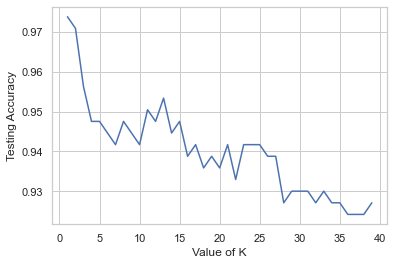

In [143]:
k_range = range(1, 40)

# Creating a Python list by [] and then appending the accuracy scores

scores = []
knnScores=[]
#  looping through the k range 1 to 40

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    # appending the accuracy scores in the dictionary named scores.
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
highScore=max(scores)
max_index = scores.index(highScore)

print('For a K range of 40, The maximum Testing Accuracy is at achieved at a rate of', 100*max(scores),'% when K is equal to ', max_index+1)
# Printing the K number of neighbors and Testing Accuracy.
import matplotlib.pyplot as plt

# This command allow plots to appear within the notebook
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

## Comments
#### Changing the k value has an impact on the accuracy of the model. We choose a K range of  1 through 40 to iterate through and observe the accuracy rates for this range. We see that the highest accuracy is achieved at a K= 1, and it drops ~2-3% points at K= 5 but it maintains a fluctuating accuracy curve up until K approaches 15. From that point and onwards, the model testing accuracy goes on a consistent downward trend, which seems to show that the a larger K value might lead to underfitting data. These claims can be better understood and confirmed through the cross validation and other optimization techniques that will be conducted below.

## 7-B) Performance Improvement techniques cross validation

In [86]:
# Optimizing the k-nn by using Cross validation

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

#train model with cv of 10
cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.97826087 0.98540146 0.94160584 0.96350365 0.95620438 0.96350365
 0.97810219 0.97810219 0.97080292 0.96350365]
0.9678990796572517


## Comments
#### The 10 fold cross validation scores are close to the testing accuracy scores, which gives us confidence that the model above is not overfitting and underfitting to a specific split of the data.

## 7-C) Performance Improvement techniques cross validation: k values and crossvalidation 

In [91]:
# Using cross validation with all possible k values.

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Train with 10 fold cross validation by an outer k value ranges and nested cross validation scores.
X = scaler.transform(X)
avgScores = []
k_range = range(1, 40)
for k in k_range:
#train model with cv of 10
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    avgScores.append(np.mean(cv_scores))

highScore=max(avgScores)
max_index = avgScores.index(highScore)    
print('For a K range of 40, The maximum cross validation accuracy is at achieved at a rate of', 100*highScore,'% when K is equal to ', max_index+1)    

#Prediction     
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
accuracy_scores = metrics.accuracy_score(y_test, y_pred) 
print(accuracy_scores) 



1
[0.97101449 0.97810219 0.97080292 0.97810219 0.98540146 0.94890511
 0.96350365 0.97080292 0.97080292 0.97810219]
0.971554004019888
2
[0.97826087 0.97810219 0.94160584 0.97080292 0.94160584 0.94160584
 0.97080292 0.98540146 0.97810219 0.94890511]
0.9635195176134561
3
[0.97826087 0.98540146 0.94160584 0.96350365 0.95620438 0.96350365
 0.97810219 0.97810219 0.97080292 0.96350365]
0.9678990796572517
4
[0.98550725 0.97080292 0.93430657 0.96350365 0.9270073  0.94160584
 0.97810219 0.97080292 0.96350365 0.95620438]
0.9591346662435205
5
[0.98550725 0.97810219 0.93430657 0.96350365 0.94160584 0.95620438
 0.97810219 0.95620438 0.95620438 0.94890511]
0.9598645932508199
6
[0.97101449 0.97810219 0.93430657 0.96350365 0.91970803 0.95620438
 0.96350365 0.97080292 0.95620438 0.93430657]
0.9547656828520047
7
[0.97101449 0.97810219 0.91970803 0.95620438 0.93430657 0.94890511
 0.96350365 0.97080292 0.94890511 0.95620438]
0.9547656828520046
8
[0.97101449 0.97080292 0.91240876 0.94890511 0.9270073  0.948

## Comments
#### The cross validation score is highest at K=1, which gives added confidence in testing accuracy observed in the first iterative model in 7-A), we see consistent performance across a wide range of K values for 10-fold validation. This provides added confidence in the model. We also see a drop in CV scores for higher Ks that is consistent with the drop in testing accuracy seen in the plot in 7-A 

## 7-D) Performance Improvement techniques: Feature Importance

      variance  skewness  curtosis  entropy
0      4.54590   8.16740   -2.4586 -1.46210
1      3.86600  -2.63830    1.9242  0.10645
2      3.45660   9.52280   -4.0112 -3.59440
3      0.32924  -4.45520    4.5718 -0.98880
4      4.36840   9.67180   -3.9606 -3.16250
...        ...       ...       ...      ...
1366   0.40614   1.34920   -1.4501 -0.55949
1367  -1.38870  -4.87730    6.4774  0.34179
1368  -3.75030 -13.45860   17.5932 -2.77710
1369  -3.56370  -8.38270   12.3930 -1.28230
1370  -2.54190  -0.65804    2.6842  1.19520

[1371 rows x 4 columns]
[0.60876547 0.21980348 0.15128847 0.02014257]
[3 2 1 0]
variance    0.608765
skewness    0.219803
curtosis    0.151288
entropy     0.020143
dtype: float64


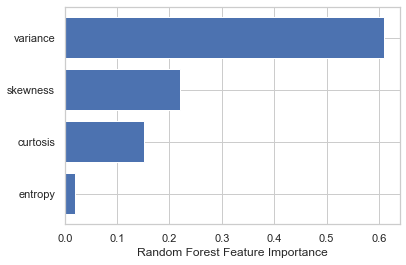

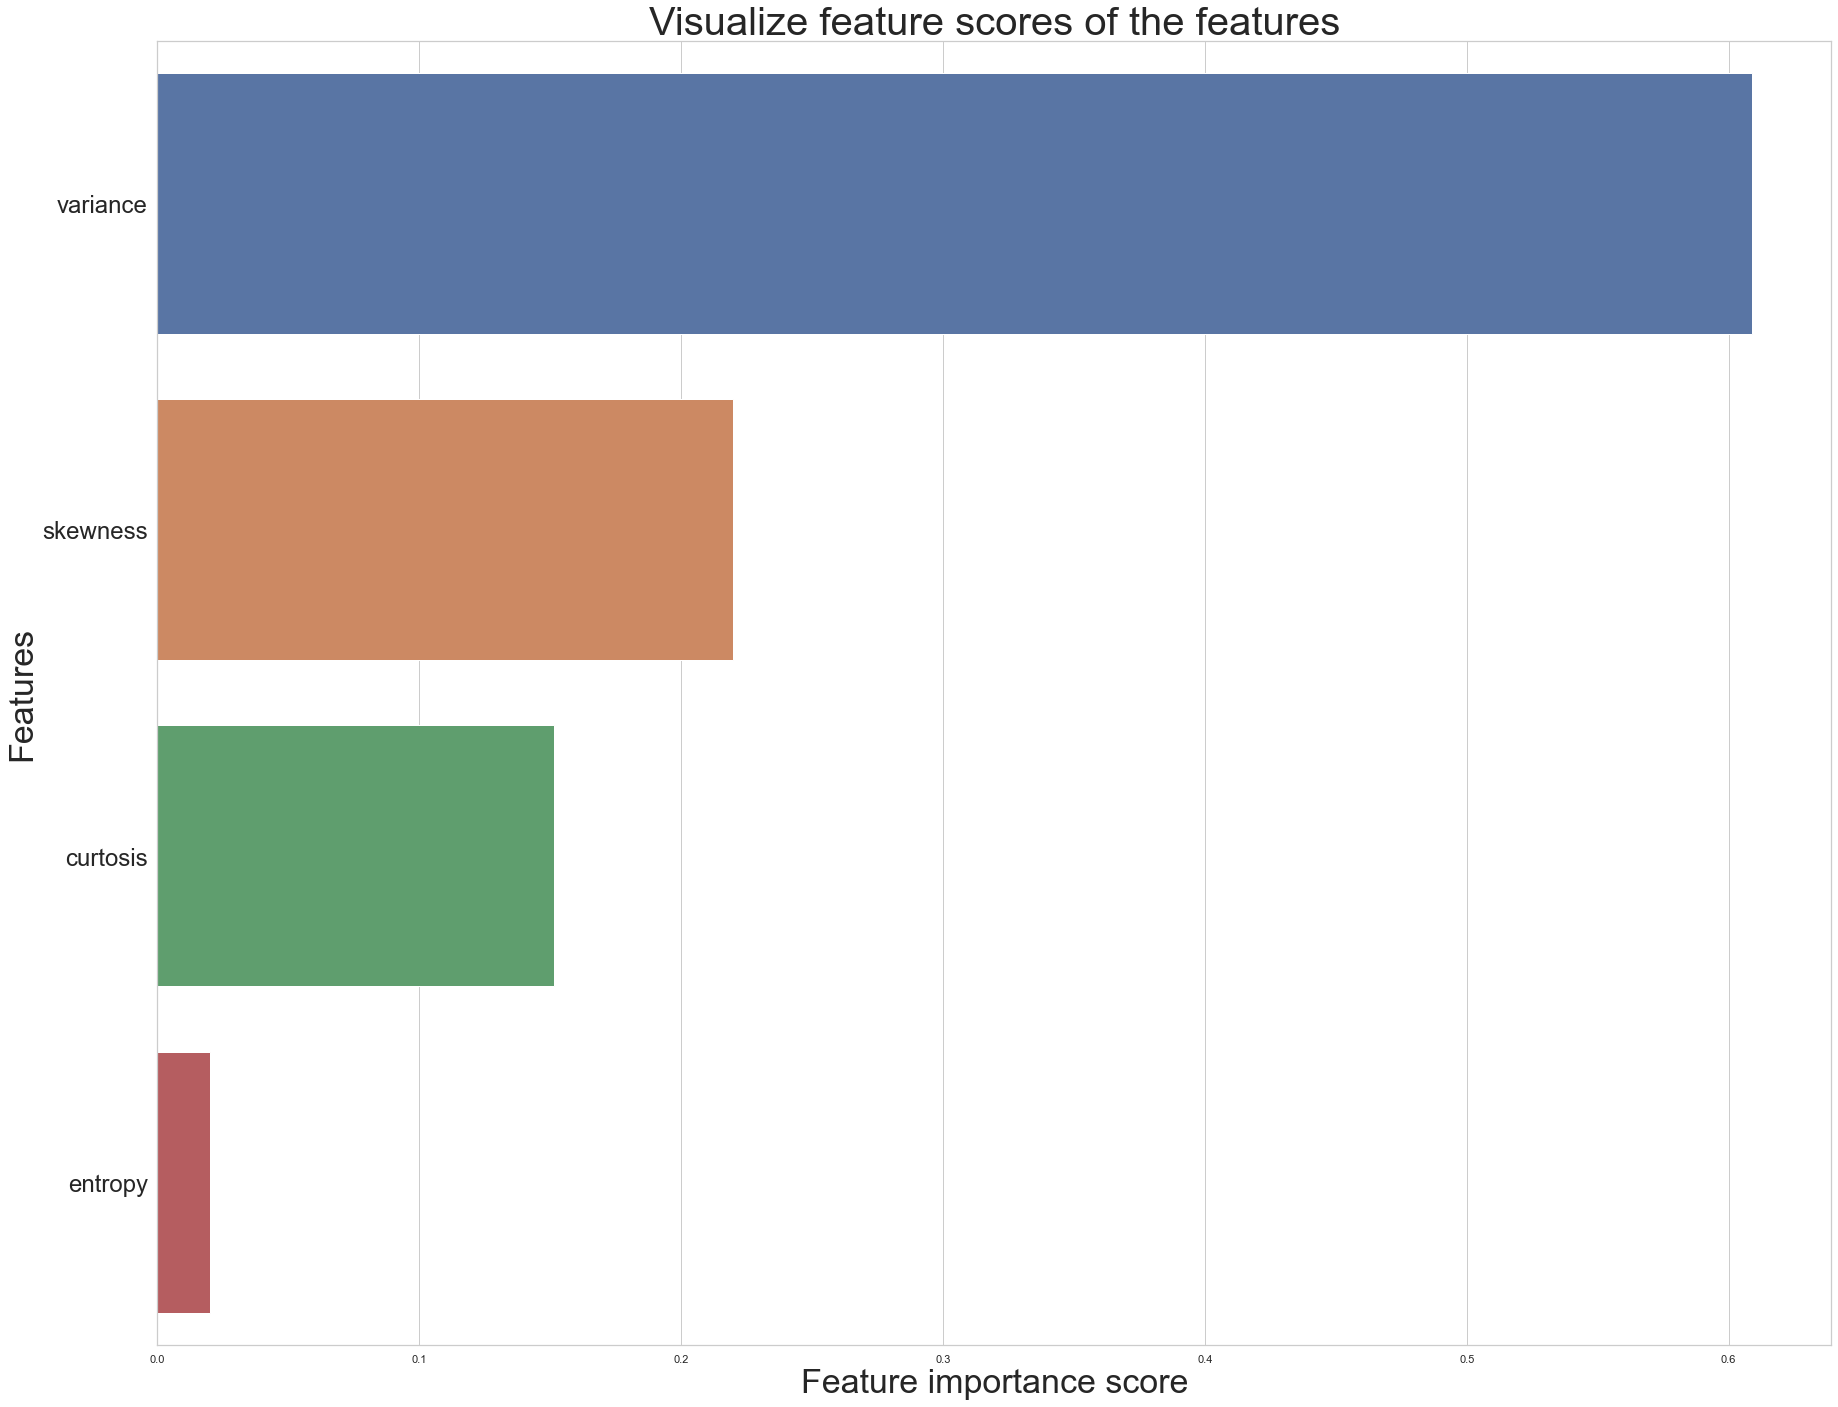

In [119]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
from matplotlib import pyplot as plt


# overriding the default figure size and font size.
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})


bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
X = pd.DataFrame(bankNoteAuth)
X = X.iloc[:,0:4]
print(X)

y = bankNoteAuth['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Generating the importance of predictive variables using Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

print(rf.feature_importances_)
# Sorting them in descending order
sorted_idx = rf.feature_importances_.argsort()

# Printing feature scores
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
print(sorted_idx)
# alternate way of viewing the feature scores in descending order
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)
# f, ax represents  figure f and the axes.
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=bankNoteAuth.T)
ax.set_title("Visualize feature scores of the features", fontsize=40)
ax.set_yticklabels(feature_scores.index,fontsize=24)
ax.set_xlabel("Feature importance score",fontsize = 34)
ax.set_ylabel("Features",fontsize = 34)
plt.show()



      skewness  curtosis  entropy
0      8.16740   -2.4586 -1.46210
1     -2.63830    1.9242  0.10645
2      9.52280   -4.0112 -3.59440
3     -4.45520    4.5718 -0.98880
4      9.67180   -3.9606 -3.16250
...        ...       ...      ...
1366   1.34920   -1.4501 -0.55949
1367  -4.87730    6.4774  0.34179
1368 -13.45860   17.5932 -2.77710
1369  -8.38270   12.3930 -1.28230
1370  -0.65804    2.6842  1.19520

[1371 rows x 3 columns]
[0.56742314 0.25261679 0.17996007]
[2 1 0]
skewness    0.567423
curtosis    0.252617
entropy     0.179960
dtype: float64


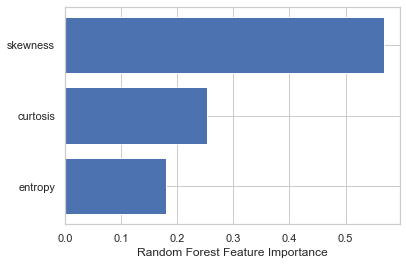

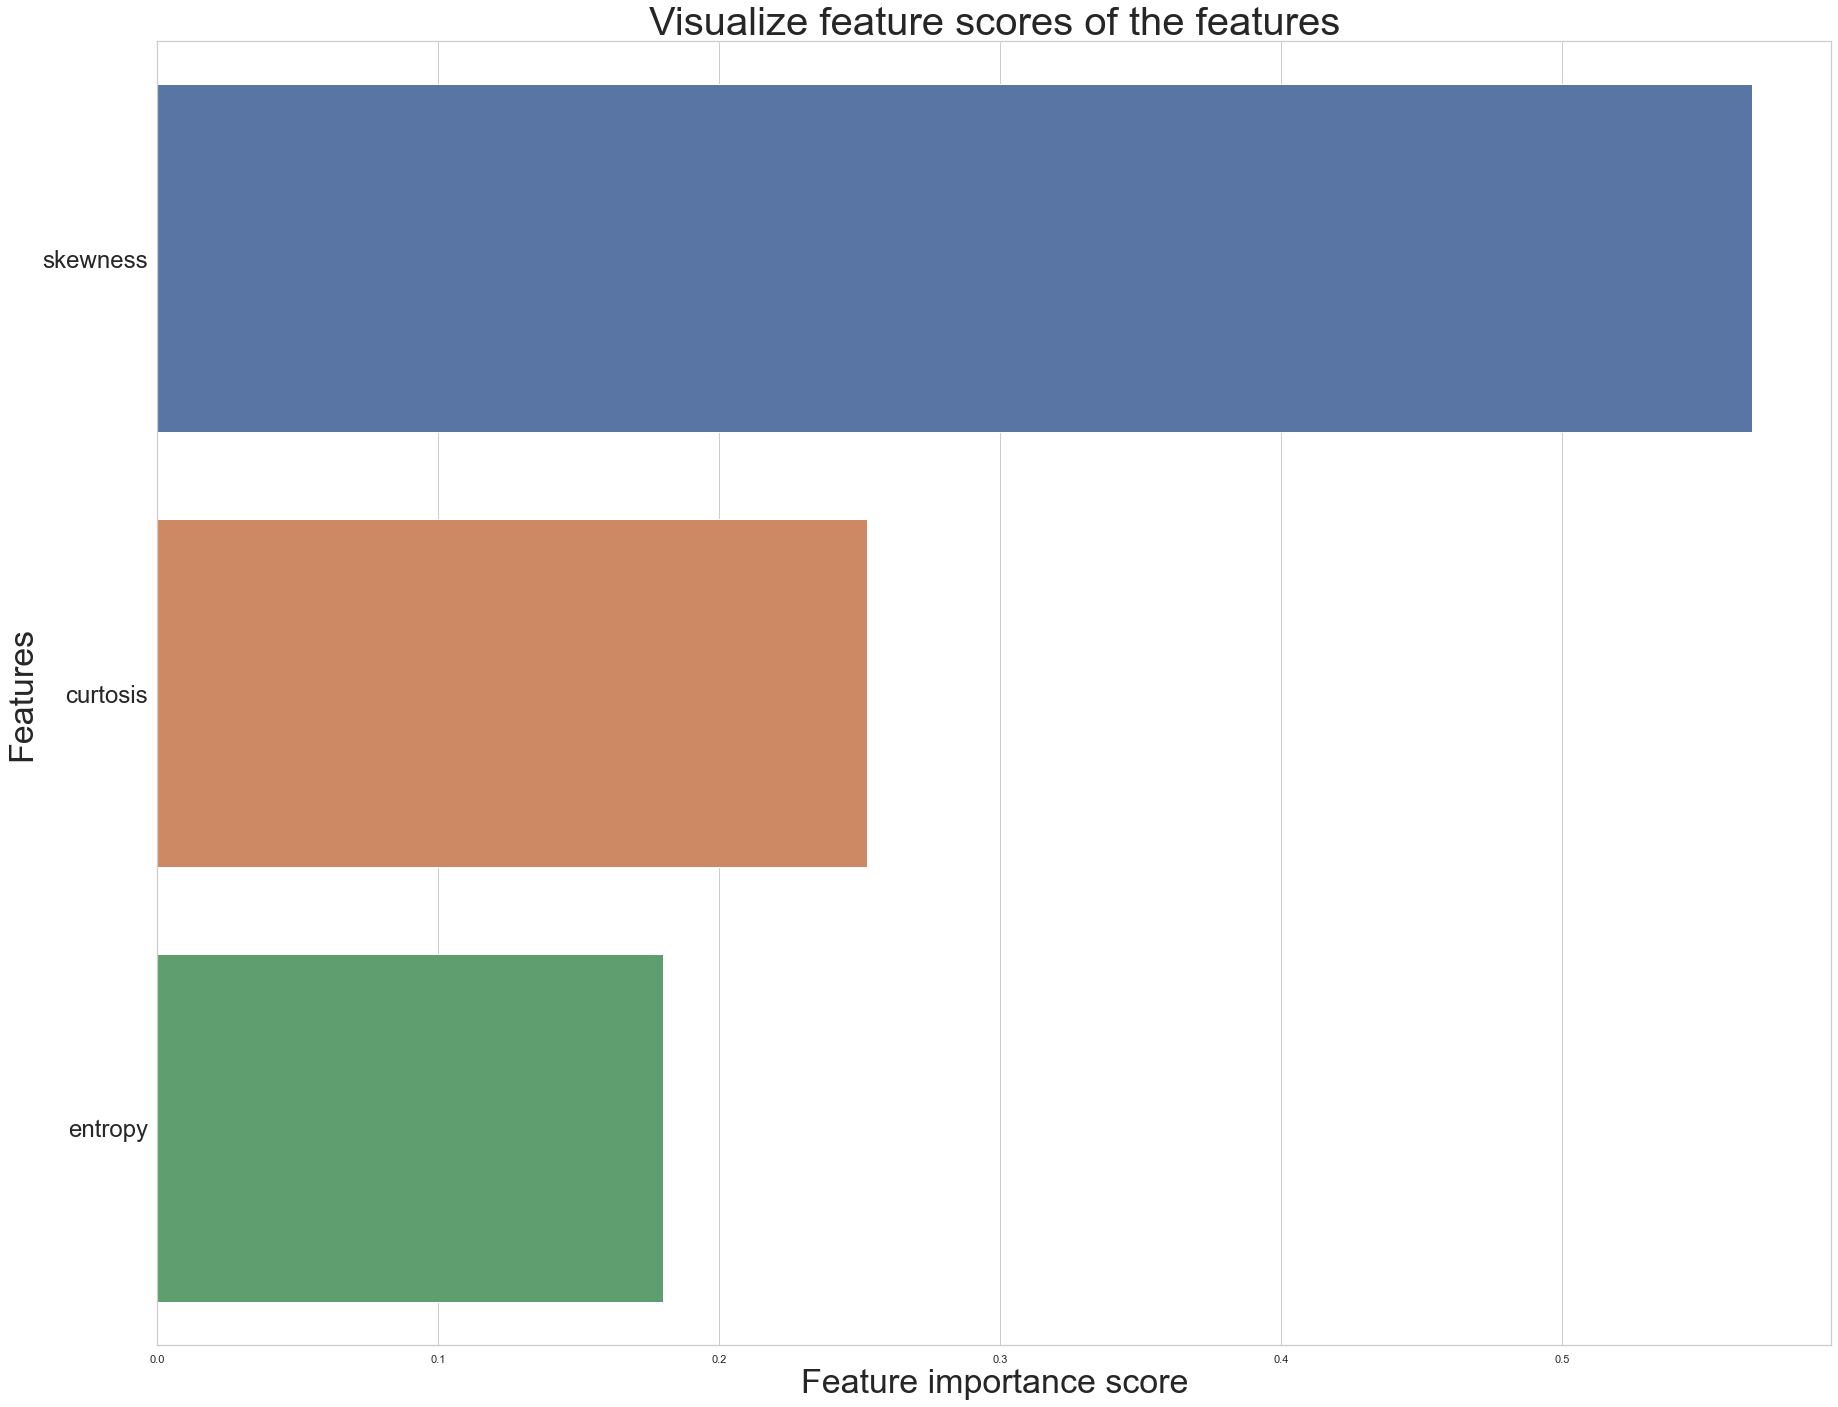

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")
from matplotlib import pyplot as plt


# overriding the default figure size and font size.
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})


bankNoteAuth = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth.columns=["variance","skewness","curtosis","entropy","class"]
X = pd.DataFrame(bankNoteAuth)
X = X.iloc[:,1:4]
print(X)

y = bankNoteAuth['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Generating the importance of predictive variables using Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

print(rf.feature_importances_)
# Sorting them in descending order
sorted_idx = rf.feature_importances_.argsort()

# Printing feature scores
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
print(sorted_idx)
# alternate way of viewing the feature scores in descending order
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)
# f, ax represents  figure f and the axes.
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=bankNoteAuth.T)
ax.set_title("Visualize feature scores of the features", fontsize=40)
ax.set_yticklabels(feature_scores.index,fontsize=24)
ax.set_xlabel("Feature importance score",fontsize = 34)
ax.set_ylabel("Features",fontsize = 34)
plt.show()



In [126]:
# Using a subset of predictor feature variables for the classification:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

bankNoteAuth_Optimize = pd.read_csv("data_banknote_authentication.txt")
bankNoteAuth_Optimize.columns=["variance","skewness","curtosis","entropy","class"]

X = bankNoteAuth_Optimize[["skewness","curtosis"]] 
y = bankNoteAuth_Optimize[["class"]]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
scores = []
k_range = range(1, 40)
for k in k_range:
#train model with cv of 10
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv, X, np.ravel(y,order='C'), cv=10)
#print each cv score (accuracy) and average them
    print(k)
    print(cv_scores)
    print(np.mean(cv_scores))
    
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn.predict(X_test)
accuracy_scores = metrics.accuracy_score(y_test, y_pred) 
print('The accuracy scores are',100*accuracy_scores,'%')  

1
[0.91304348 0.88321168 0.9270073  0.91240876 0.93430657 0.87591241
 0.94890511 0.90510949 0.89781022 0.91240876]
0.9110123770231672
2
[0.91304348 0.91240876 0.89781022 0.90510949 0.89781022 0.89051095
 0.93430657 0.91240876 0.91970803 0.91240876]
0.9095525230085688
3
[0.92028986 0.88321168 0.91970803 0.89781022 0.91970803 0.89051095
 0.9270073  0.89781022 0.89781022 0.9270073 ]
0.9080873796678304
4
[0.91304348 0.89051095 0.89781022 0.91240876 0.89051095 0.86861314
 0.90510949 0.89051095 0.91970803 0.93430657]
0.9022532529355761
5
[0.92028986 0.88321168 0.91970803 0.91970803 0.90510949 0.86861314
 0.9270073  0.90510949 0.90510949 0.93430657]
0.9088173066751297
6
[0.92028986 0.87591241 0.90510949 0.91970803 0.89051095 0.88321168
 0.94160584 0.89781022 0.9270073  0.91970803]
0.9080873796678304
7
[0.93478261 0.88321168 0.87591241 0.90510949 0.91240876 0.86861314
 0.94890511 0.91970803 0.93430657 0.94160584]
0.9124563630593462
8
[0.92028986 0.87591241 0.84671533 0.89781022 0.87591241 0.87

## Comments
#### The first run and performance improvement techniques will include 'variance'. It was excluded from modeling based on the pairplot separation above since the graphical results showed that it had a great positive impact on the testing accuracy of the model which was at 100% prior to the removal of 'variance'. The RandomForestRegressor enabled us to use a quantitative model that confirmed that 'Variance' is the most important feature to boost the accuracy of the model. 

#### The same analysis was repeated with the three other variables with 'variance' excluded. We see that 'skewness' becomes the most important feature in the absence of 'variance'. This is consistent with the results we got above with our first model with k=10, for which the test accuracy dropped ~5% when 'variance' was excluded. 

#### Finally, we see that the exclusion of 'entropy', which was ranked the lowest as far as importance to the model, had a negative impact on the cross validation scores as expected with any feature ommission. In our current dataset and for the authentication application, the model is quick and efficient with all three predictors, so it makes sense to seek higher accuracy by utilizing all available features. However, for some applications and heavier datasets, the tradeoff that would lead to a drop in accuracy due to feature omission would make more sense if processing power and turnaround time are of bigger importance over precision.

## 8-Evaluating Algorithms: Train versus Test, Error Rates


Max train score 100.0 % and k = [1]
Max test score 97.37609329446065 % and k = [1]


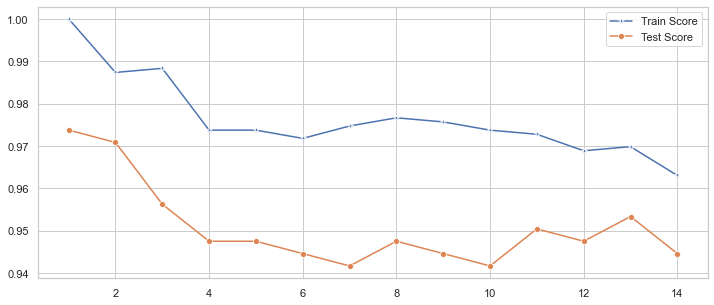

In [127]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
## Training Evaluation
max_train_score = max(train_scores)

# # Store the max train test score index by enumerating through all the scores.

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# Store the max score in the first curly parenthesis and the indices in the second.
# The lambda function takes the index starting at zero therefore one is added to get the k value.

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_scores)

test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation by comparative graph.
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Text(0, 0.5, 'Mean Error')

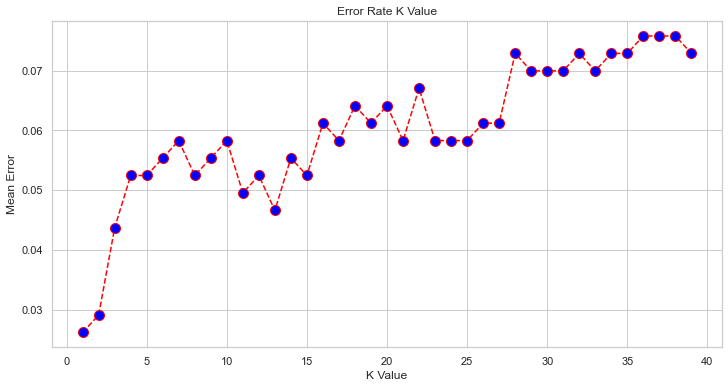

In [128]:
## Error Rate Graph
# Create an empty dictionary to collect errors across the different k-values
error = []

# Iterate throught k=1 to 40  and run the classifier.Predict and append the error for each iteration.
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    # Create a plot of Mean error versus kvalue.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Conclusion
#### We see that the model train and test scores are both highest for k=1 with the lowest mean error rate which suggests that the classification of banknotes is best done through a look at the first nearest neighbor in order to accurately classify. This is also consistent with the 10 fold cross validation scores we saw above for k=1 which was also the highest, so this gives us confidence that the results are consistent across the entire dataset. Using K=1 for this data is a good approach to get accurate predictions, and therefore it is a suitable model. Of course, we could achieve even better results with 'variance' included as a predictor as evidenced by the accuracy metrics, pairplots, and random forest feature selection results, but it was excluded for better learning opportunities.
#### Limitations: A kNN algorithm does not work well if the data has too much noise, but this dataset had no noise or missing elements, which is rare in most practical datasets.
#### Future work: 1-Purposely deleting data points and using imputation techniques to see the impact on the accuracy of the model. 
#### 2-Comparing other Machine Learning models' performance for this dataset to see the impact on accuracy